In [1]:
# Install PyTorch
!pip install torch

# Install torchvision
!pip install torchvision

# Install OpenCV
!pip install opencv-python

# Install Matplotlib
!pip install matplotlib

# Install face_recognition
!pip install face_recognition

In [2]:
#THis code is to check if the video is corrupted or not..
#If the video is corrupted delete the video.
import glob
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition

In [3]:
#Check if the file is corrupted or not
def validate_video(vid_path,train_transforms):
      transform = train_transforms
      count = 20
      video_path = vid_path
      frames = []
      a = int(100/count)
      first_frame = np.random.randint(0,a)
      temp_video = video_path.split('/')[-1]
      for i,frame in enumerate(frame_extract(video_path)):
        frames.append(transform(frame))
        if(len(frames) == count):
          break
      frames = torch.stack(frames)
      frames = frames[:count]
      return frames

In [4]:
#extract a from from video
def frame_extract(path):
  vidObj = cv2.VideoCapture(path) 
  success = 1
  while success:
      success, image = vidObj.read()
      if success:
          yield image

In [5]:
im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
video_fil =  glob.glob('Celeb_fake_face_only/*.mp4')
video_fil += glob.glob('Celeb_real_face_only/*.mp4')
video_fil += glob.glob('DFDC_FAKE_Face_only_data/*.mp4')
video_fil += glob.glob('DFDC_REAL_Face_only_data/*.mp4')
video_fil += glob.glob('FF_Face_only_data/*.mp4')
print("Total no of videos :" , len(video_fil))
print(video_fil)

Total no of videos : 6450
['Celeb_fake_face_only\\id0_id16_0000.mp4', 'Celeb_fake_face_only\\id0_id16_0001.mp4', 'Celeb_fake_face_only\\id0_id16_0008.mp4', 'Celeb_fake_face_only\\id0_id17_0001.mp4', 'Celeb_fake_face_only\\id0_id1_0005.mp4', 'Celeb_fake_face_only\\id0_id20_0006.mp4', 'Celeb_fake_face_only\\id0_id28_0002.mp4', 'Celeb_fake_face_only\\id0_id2_0005.mp4', 'Celeb_fake_face_only\\id0_id4_0006.mp4', 'Celeb_fake_face_only\\id0_id9_0002.mp4', 'Celeb_fake_face_only\\id10_id11_0004.mp4', 'Celeb_fake_face_only\\id10_id11_0005.mp4', 'Celeb_fake_face_only\\id10_id11_0006.mp4', 'Celeb_fake_face_only\\id10_id11_0007.mp4', 'Celeb_fake_face_only\\id10_id12_0002.mp4', 'Celeb_fake_face_only\\id10_id12_0005.mp4', 'Celeb_fake_face_only\\id10_id12_0006.mp4', 'Celeb_fake_face_only\\id10_id13_0002.mp4', 'Celeb_fake_face_only\\id10_id13_0008.mp4', 'Celeb_fake_face_only\\id10_id7_0004.mp4', 'Celeb_fake_face_only\\id11_id7_0001.mp4', 'Celeb_fake_face_only\\id11_id7_0002.mp4', 'Celeb_fake_face_only\

In [6]:
count = 0;
for i in video_fil:
  try:
    count+=1
    validate_video(i,train_transforms)
  except:
    print("Number of video processed: " , count ," Remaining : " , (len(video_fil) - count))
    print("Corrupted video is : " , i)
    continue
print((len(video_fil) - count))

0


In [7]:
#to load preprocessod video to memory
import json
import glob
import numpy as np
import cv2
import copy
import random
video_files =  glob.glob('Celeb_fake_face_only/*.mp4')
video_files += glob.glob('Celeb_real_face_only/*.mp4')
video_files += glob.glob('DFDC_FAKE_Face_only_data/*.mp4')
video_files += glob.glob('DFDC_REAL_Face_only_data/*.mp4')
video_files = glob.glob('FF_Face_only_data/*.mp4')
random.shuffle(video_files)
random.shuffle(video_files)
frame_count = []
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<100):
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames are " , frame_count)
print("Total no of video: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

frames are  [148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 14

In [8]:
class video_dataset(Dataset):
    def __init__(self, video_names, labels, sequence_length=60, transform=None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.count = sequence_length

    def __len__(self):
        return len(self.video_names)

    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path)
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image

    def im_plot(tensor):
        image = tensor.cpu().numpy().transpose(1,2,0)
        b,g,r = cv2.split(image)
        image = cv2.merge((r,g,b))
        image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
        image = image*255.0
        plt.imshow(image.astype(int))
        plt.show()

    def __getitem__(self, idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100 / self.count)
        first_frame = np.random.randint(0, a)
        temp_video = os.path.basename(video_path)

        matching_rows = self.labels.loc[self.labels["file"] == temp_video]

        if not matching_rows.empty:
            label = matching_rows.iloc[0, 1]
            # Convert label to numeric values
            if label == 'FAKE':
                label = 0
            elif label == 'REAL':
                label = 1
        else:
            # Handle the case when matching_rows is empty
            # Set a default label or skip the data point
            label = -1

        if label is None:
            # Handle the case when label is None
            # For example, set a default label or skip the data point
            label = -1

        for i, frame in enumerate(self.frame_extract(video_path)):
            frames.append(self.transform(frame))
            if len(frames) == self.count:
                break

        frames = torch.stack(frames)
        frames = frames[:self.count]

        return frames, label

In [9]:
def number_of_real_and_fake_videos(data_list, lab):
    real = 0
    fake = 0
    for i in data_list:
        temp_video = i.split('/')[-1]
        matching_rows = labels.loc[labels["file"] == temp_video]
        if not matching_rows.empty:
            label = matching_rows.iloc[0, 1]
            if label == 'FAKE':
                fake += 1
            else:
                real += 1
    return real, fake

In [10]:
!pip install pandas

In [11]:
# load the labels and video in data loader
import random
import pandas as pd
from sklearn.model_selection import train_test_split

header_list = ["file","label"]
labels = pd.read_csv('Gobal_metadata.csv',names=header_list)
print(labels)
train_videos = video_files[:int(0.8*len(video_files))]
valid_videos = video_files[int(0.8*len(video_files)):]
print("train : " , len(train_videos))
print("test : " , len(valid_videos))

                 file label
0             000.mp4  REAL
1         000_003.mp4  FAKE
2             001.mp4  REAL
3         001_870.mp4  FAKE
4             002.mp4  REAL
...               ...   ...
23181  ybbrkacebd.mp4  REAL
23182  ybnucgidtu.mp4  REAL
23183  yexeazbqig.mp4  REAL
23184  yhylappzid.mp4  REAL
23185  yljecirelf.mp4  REAL

[23186 rows x 2 columns]
train :  1589
test :  398


In [12]:
# Usage:
print("TRAIN: ", "Real:", number_of_real_and_fake_videos(train_videos, labels)[0], " Fake:", number_of_real_and_fake_videos(train_videos, labels)[1])
print("TEST: ", "Real:", number_of_real_and_fake_videos(valid_videos, labels)[0], " Fake:", number_of_real_and_fake_videos(valid_videos, labels)[1])

TRAIN:  Real: 0  Fake: 0
TEST:  Real: 0  Fake: 0


In [13]:
def im_plot(tensor):
        image = tensor.cpu().numpy().transpose(1,2,0)
        b,g,r = cv2.split(image)
        image = cv2.merge((r,g,b))
        image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
        image = image*255.0
        plt.imshow(image.astype(int))
        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


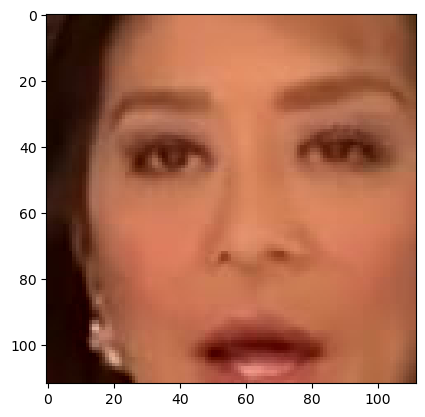

In [14]:
#Setting Image Size and Normalization Parameters:
im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

#Defining Data Transformations:
train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

test_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

#Creating Video Datasets and DataLoaders
train_data = video_dataset(train_videos,labels,sequence_length = 10,transform = train_transforms)
#print(train_data)
val_data = video_dataset(valid_videos,labels,sequence_length = 10,transform = train_transforms)
train_loader = DataLoader(train_data,batch_size = 4,shuffle = True,num_workers = 4)
valid_loader = DataLoader(val_data,batch_size = 4,shuffle = True,num_workers = 4)

#Visualizing a Sample Image
image,label = train_data[0]
im_plot(image[0,:,:,:])

In [15]:
#Model with feature visualization
from torch import nn
from torchvision import models
class Model(nn.Module):
    def __init__(self, num_classes,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model, self).__init__()
        model = models.resnext50_32x4d(pretrained = True)
        #Residual Network CNN
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048,num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
    def forward(self, x):
        batch_size,seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size,seq_length,2048)
        x_lstm,_ = self.lstm(x,None)
        return fmap,self.dp(self.linear1(torch.mean(x_lstm,dim = 1)))

In [16]:
model = Model(2).cuda()
a,b = model(torch.from_numpy(np.empty((1,20,3,112,112))).type(torch.cuda.FloatTensor))

C:\Users\pagolu\anaconda3\envs\finalproject\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\pagolu\anaconda3\envs\finalproject\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AssertionError: Torch not compiled with CUDA enabled

In [17]:
import torch
print(torch.__version__)

2.1.2


In [18]:
import torch
print(torch.cuda.is_available())


None


In [ ]:
import subprocess

# Run the nvcc --version command to get CUDA version
result = subprocess.run(['nvcc', '--version'], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

# Print the result
print(result.stdout)

In [ ]:
import torch

# Check if CUDA is available in PyTorch
cuda_available = torch.cuda.is_available()

if cuda_available:
    # Print PyTorch CUDA version
    print(f"PyTorch CUDA version: {torch.version.cuda}")
else:
    print("CUDA is not available.")
